In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D

from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation

In [2]:
batchsize=8

In [3]:
train_datagen= ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2, validation_split=0.2)

train_data= train_datagen.flow_from_directory(r'D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\Prepared_Data\train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical',subset='training' )

validation_data= train_datagen.flow_from_directory(r'D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\Prepared_Data\train',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 64662 images belonging to 2 classes.
Found 16165 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory(r'D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\Prepared_Data\test',
                                target_size=(80,80),batch_size=batchsize,class_mode='categorical')

Found 4071 images belonging to 2 classes.


In [5]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2,activation= 'softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
    layer.trainable = False

In [6]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 80, 80, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 39, 39, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 39, 39, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 39, 39, 32)   0           ['batch_normalization[0][0]']

In [7]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau


In [8]:
checkpoint = ModelCheckpoint(r'D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\models\model-inceptionV3.h5',
                            monitor='val_loss',save_best_only=True,verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', patience=2, verbose= 1, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=0, verbose= 1,factor=0.2, )

callbacks=[checkpoint,earlystop,learning_rate]

In [9]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,
                   validation_data=validation_data,
                   validation_steps=validation_data.samples//batchsize,
                   callbacks=callbacks,
                    epochs=8)

C:\Users\pc\AppData\Local\Temp\ipykernel_12112\2053674824.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data,steps_per_epoch=train_data.samples//batchsize,


Epoch 1/5
8082/8082 [==============================] - ETA: 0s - loss: 0.2026 - accuracy: 0.9202
Epoch 1: val_loss improved from inf to 0.26844, saving model to D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\models\model-inceptionV3.h5
8082/8082 [==============================] - 3083s 381ms/step - loss: 0.2026 - accuracy: 0.9202 - val_loss: 0.2684 - val_accuracy: 0.8834 - lr: 0.0010
Epoch 2/5
8082/8082 [==============================] - ETA: 0s - loss: 0.1806 - accuracy: 0.9298
Epoch 2: val_loss improved from 0.26844 to 0.23742, saving model to D:\namcuoi\Driver_Drowsiness_Detection\MRL eye data\models\model-inceptionV3.h5
8082/8082 [==============================] - 387s 48ms/step - loss: 0.1806 - accuracy: 0.9298 - val_loss: 0.2374 - val_accuracy: 0.8934 - lr: 0.0010
Epoch 3/5
8082/8082 [==============================] - ETA: 0s - loss: 0.1708 - accuracy: 0.9348
Epoch 3: val_loss did not improve from 0.23742

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949

In [11]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df

,loss,accuracy,val_loss,val_accuracy,lr
0,0.202619,0.920237,0.268438,0.883354,0.0010
1,0.180583,0.929796,0.237417,0.893441,0.0010
2,0.170825,0.934791,0.251389,0.892884,0.0010
3,0.155140,0.941442,0.266415,0.892512,0.0002


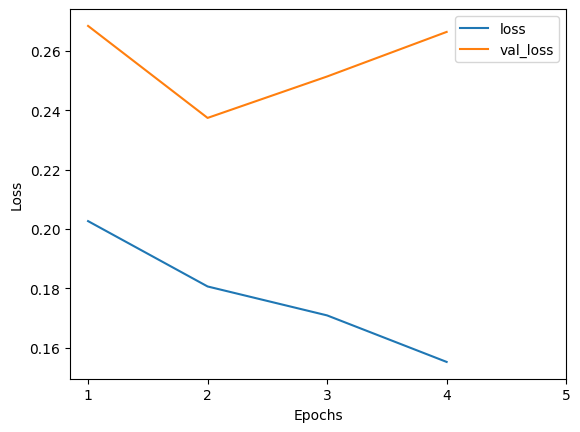

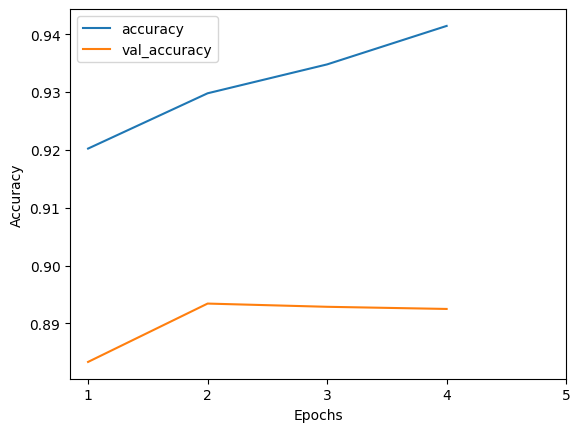

In [12]:
import matplotlib.pyplot as plt

history_df[['loss','val_loss']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(list(range(5)),list(range(1,6)))
plt.show()

history_df[['accuracy','val_accuracy']].plot(kind='line')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(list(range(5)),list(range(1,6)))
plt.show()